<a href="https://colab.research.google.com/github/Viroslav/Projects/blob/main/OpenDS(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

pd.set_option("display.max.columns", 100)
# to draw pictures in jupyter notebook
%matplotlib inline
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

In [ ]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
DATA_URL = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"

In [ ]:
data = pd.read_csv(DATA_URL + "adult.data.csv")
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


1. How many men and women (sex feature) are represented in this dataset?

In [ ]:
data.sex.value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

2. What is the average age (age feature) of women?

In [ ]:
data.query("sex == 'Female'").age.mean()

36.85823043357163

3. What is the percentage of German citizens (native-country feature)?

In [ ]:
data['native-country'].unique()
data[data['native-country'] == 'Germany'].age.count()/data.shape[0]*100

0.42074874850281013

4-5. What are the mean and standard deviation of age for those who earn more than 50K per year (salary feature) and those who earn less than 50K per year?

In [ ]:
data.salary.unique()
print(data.query("salary == '>50K'").age.mean(), data.query("salary == '>50K'").age.std())
print(data.query("salary == '<=50K'").age.mean(), data.query("salary == '<=50K'").age.std())
print("The average age of the rich: {0} +- {1} years, poor - {2} +- {3} years.".format(
        round(data.query("salary == '>50K'").age.mean()),
        round(data.query("salary == '>50K'").age.std(), 1),
        round(data.query("salary == '<=50K'").age.mean()),
        round(data.query("salary == '<=50K'").age.std(), 1)))

44.24984058155847 10.519027719851826
36.78373786407767 14.02008849082488
The average age of the rich: 44 +- 10.5 years, poor - 37 +- 14.0 years.


6. Is it true that people who earn more than 50K have at least high school education? (education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters or Doctorate feature)

In [ ]:
data.education.unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [ ]:
sns.set(
    font_scale = 2,
    style      = "whitegrid",  # белый фон и линии за заднем плане
    rc         = {'figure.figsize' :(20, 7)})  # set - установка графиков по умолчанию

In [ ]:
data.query("salary == '>50K'").groupby('education', as_index = False).agg({'fnlwgt':'count'}).rename(columns = {'fnlwgt':'quantity'})

,education,quantity
0,10th,62
1,11th,60
2,12th,33
3,1st-4th,6
4,5th-6th,16
5,7th-8th,40
6,9th,27
7,Assoc-acdm,265
8,Assoc-voc,361
9,Bachelors,2221


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

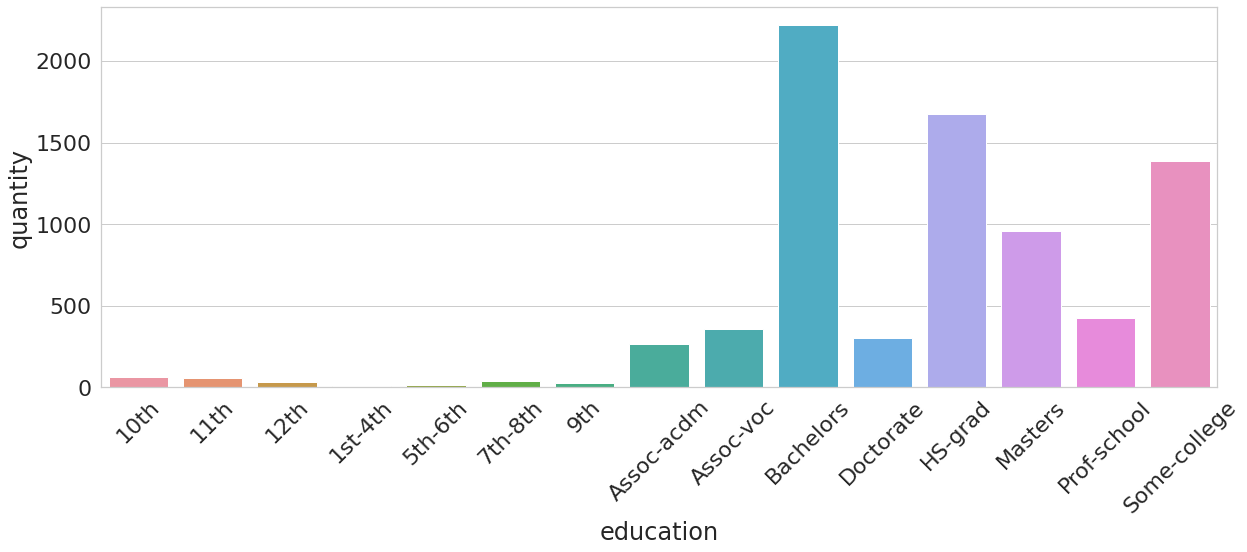

In [ ]:
sns.barplot(data = data.query("salary == '>50K'").groupby('education', as_index = False).agg({'fnlwgt':'count'}).rename(columns = {'fnlwgt':'quantity'}),
            x = 'education', y = 'quantity')
plt.xticks(rotation=45)

7. Display age statistics for each race (race feature) and each gender (sex feature). Use groupby() and describe(). Find the maximum age of men of Amer-Indian-Eskimo race.

In [ ]:
data.groupby(['race', 'sex']).describe()

age                                          \
                             count       mean        std   min   25%   50%   
race               sex                                                       
Amer-Indian-Eskimo Female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                   Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
Asian-Pac-Islander Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                   Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
Black              Female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                   Male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
Other              Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                   Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
White              Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                   Male    19174.0  39.652498  13.436029  17.0  29.0  38.0   

                                         fnlwgt                                \
                             75%   max    count           mean            std   
race               sex                                                          
Amer-Indian-Eskimo Female  46.00  80.0    119.0  112950.731092   93207.974077   
                   Male    45.00  82.0    192.0  125715.364583   85063.251595   
Asian-Pac-Islander Female  43.75  75.0    346.0  147452.075145   76401.627757   
                   Male    46.00  90.0    693.0  166175.865801   88552.952600   
Black              Female  46.00  90.0   1555.0  212971.387781  109971.263983   
                   Male    46.00  90.0   1569.0  242920.644997  134145.970948   
Other              Female  39.00  74.0    109.0  172519.642202   77766.666801   
                   Male    42.00  77.0    162.0  213679.104938   92187.362738   
White              Female  46.00  90.0   8642.0  183549.966906  101710.294874   
                   Male    49.00  90.0  19174.0  188987.386148  103714.598850   

                                                                               \
                               min        25%       50%        75%        max   
race               sex                                                          
Amer-Indian-Eskimo Female  12285.0   31387.00   87950.0  163027.50   445168.0   
                   Male    13769.0   48197.75  113091.0  182656.00   356015.0   
Asian-Pac-Islander Female  19914.0   86879.25  131986.0  175705.75   379046.0   
                   Male    14878.0   98350.00  147719.0  200117.00   506329.0   
Black              Female  19752.0  142666.50  193553.0  253759.00   930948.0   
                   Male    21856.0  156410.00  221196.0  298601.00  1268339.0   
Other              Female  24562.0  119890.00  171199.0  219441.00   388741.0   
                   Male    25610.0  150726.75  208516.5  253334.75   481175.0   
White              Female  19395.0  115914.75  175810.5  224836.50  1484705.0   
                   Male    18827.0  117381.00  178662.5  236858.75  1455435.0   

                          education-num                                       \
                                  count       mean       std  min  25%   50%   
race               sex                                                         
Amer-Indian-Eskimo Female         119.0   9.697479  2.334540  2.0  9.0  10.0   
                   Male           192.0   9.072917  2.268587  2.0  9.0   9.0   
Asian-Pac-Islander Female         346.0  10.390173  2.796647  1.0  9.0  10.0   
                   Male           693.0  11.245310  2.777463  1.0  9.0  11.0   
Black              Female        1555.0   9.549839  2.207815  1.0  9.0   9.0   
                   Male          1569.0   9.423199  2.382841  1.0  9.0   9.0   
Other              Female         109.0   8.899083  3.027482  2.0  7.0   9.0   
                   Male           162.0   8.802469  3.361897  1.0  8.0   9.0   
White              Female   

In [ ]:
data.groupby(['race', 'sex']).describe().loc[('Amer-Indian-Eskimo', 'Male'), 'age']

count    192.000000
mean      37.208333
std       12.049563
min       17.000000
25%       28.000000
50%       35.000000
75%       45.000000
max       82.000000
Name: (Amer-Indian-Eskimo, Male), dtype: float64

8. Among whom is the proportion of those who earn a lot (>50K) greater: married or single men (marital-status feature)? Consider as married those who have a marital-status starting with Married (Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), the rest are considered bachelors.

In [ ]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
married_man_rich = data[data['marital-status'] == "Married-civ-spouse"].query('salary == ">50K"').query('sex == "Male"').shape[0] + \
          data[data['marital-status'] == "Married-spouse-absent"].query('salary == ">50K"').query('sex == "Male"').shape[0] + \
          data[data['marital-status'] == "Married-AF-spouse"].query('salary == ">50K"').query('sex == "Male"').shape[0]
married_man_rich

5965

In [ ]:
# married men
data[(data["sex"] == "Male")
     & (data["marital-status"].str.startswith("Married"))][
    "salary"
].value_counts(normalize=False)

<=50K    7576
>50K     5965
Name: salary, dtype: int64

In [ ]:
single_man_rich = data.query('salary == ">50K"').query('sex == "Male"').shape[0] - married_man_rich
single_man_rich

697

In [ ]:
# single men
data[
    (data["sex"] == "Male")
    & ~(data["marital-status"].str.startswith("Married"))
]["salary"].value_counts(normalize=False)

<=50K    7552
>50K      697
Name: salary, dtype: int64

In [ ]:
single_rich = single_man_rich/data.query('salary == ">50K"').query('sex == "Male"').shape[0] * 100 
married_rich = married_man_rich/data.query('salary == ">50K"').query('sex == "Male"').shape[0] * 100
print(f"single man who make more than 50K from all men: {round(single_rich, 4)}, Married man who make more than 50K from all men: {round(married_rich, 4)} in percantage")

single man who make more than 50K from all men: 10.4623, Married man who make more than 50K from all men: 89.5377 in percantage


9. What is the maximum number of hours a person works per week (hours-per-week feature)? How many people work such a number of hours, and what is the percentage of those who earn a lot (>50K) among them?

In [ ]:
max_hours = data['hours-per-week'].max()

99

In [ ]:
data[data['hours-per-week'] == 99].shape[0]

85

In [ ]:
rich_lvl = data[data['hours-per-week'] == 99].query('salary == ">50K"').age.count() / 85 * 100
print(f"percantage of rich among them: {rich_lvl}")

percantage of rich among them: 29.411764705882355


10. Count the average time of work (hours-per-week) for those who earn a little and a lot (salary) for each country (native-country). What will these be for Japan?

In [ ]:
data.query('salary == "<=50K"')['hours-per-week'].mean()

38.840210355987054

In [ ]:
data.query('salary == ">50K"')['hours-per-week'].mean()

45.473026399693914

In [ ]:
print(data[data['native-country'] == 'Japan'].query('salary == ">50K"')['hours-per-week'].mean(), 
      data[data['native-country'] == 'Japan'].query('salary == "<=50K"')['hours-per-week'].mean())

47.958333333333336 41.0


In [ ]:
for (country, salary), sub_df in data.groupby(["native-country", "salary"]):
    print(country, salary, round(sub_df["hours-per-week"].mean(), 2))

? <=50K 40.16
? >50K 45.55
Cambodia <=50K 41.42
Cambodia >50K 40.0
Canada <=50K 37.91
Canada >50K 45.64
China <=50K 37.38
China >50K 38.9
Columbia <=50K 38.68
Columbia >50K 50.0
Cuba <=50K 37.99
Cuba >50K 42.44
Dominican-Republic <=50K 42.34
Dominican-Republic >50K 47.0
Ecuador <=50K 38.04
Ecuador >50K 48.75
El-Salvador <=50K 36.03
El-Salvador >50K 45.0
England <=50K 40.48
England >50K 44.53
France <=50K 41.06
France >50K 50.75
Germany <=50K 39.14
Germany >50K 44.98
Greece <=50K 41.81
Greece >50K 50.62
Guatemala <=50K 39.36
Guatemala >50K 36.67
Haiti <=50K 36.33
Haiti >50K 42.75
Holand-Netherlands <=50K 40.0
Honduras <=50K 34.33
Honduras >50K 60.0
Hong <=50K 39.14
Hong >50K 45.0
Hungary <=50K 31.3
Hungary >50K 50.0
India <=50K 38.23
India >50K 46.48
Iran <=50K 41.44
Iran >50K 47.5
Ireland <=50K 40.95
Ireland >50K 48.0
Italy <=50K 39.62
Italy >50K 45.4
Jamaica <=50K 38.24
Jamaica >50K 41.1
Japan <=50K 41.0
Japan >50K 47.96
Laos <=50K 40.38
Laos >50K 40.0
Mexico <=50K 40.0
Mexico >50K 46

In [ ]:
pd.crosstab(
    data["native-country"],
    data["salary"],
    values=data["hours-per-week"],
    aggfunc=np.mean,
).T

native-country,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Holand-Netherlands,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
salary,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
<=50K,40.164760,41.416667,37.914634,37.381818,38.684211,37.985714,42.338235,38.041667,36.030928,40.483333,41.058824,39.139785,41.809524,39.360656,36.325,40.0,34.333333,39.142857,31.3,38.233333,41.44,40.947368,39.625,38.239437,41.000000,40.375,40.003279,36.09375,41.857143,35.068966,38.065693,38.166667,41.939394,38.470588,39.444444,40.15625,33.774194,42.866667,37.058824,38.799127,37.193548,41.6
>50K,45.547945,40.000000,45.641026,38.900000,50.000000,42.440000,47.000000,48.750000,45.000000,44.533333,50.750000,44.977273,50.625000,36.666667,42.750,NaN,60.000000,45.000000,50.0,46.475000,47.50,48.000000,45.400,41.100000,47.958333,40.000,46.575758,37.50000,NaN,40.000000,43.032787,39.000000,41.500000,39.416667,46.666667,51.43750,46.800000,58.333333,40.000000,45.505369,39.200000,49.5
